In [4]:
import pandas as pd

# Загружаем данные
df = pd.read_csv('../parser/drom_full.csv')

df = df.dropna()
df.shape

(908, 16)

In [5]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['brand', 'model', 'generation', 'restyling', 'fuel_t',
            'transmission', 'drive', 'body-type', 'steering', 'equipment']

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le  # сохраним энкодеры, чтобы потом преобразовывать новые данные


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100],
    'random_state': [i for i in range(42, 52)],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.7],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                    scoring='r2', cv=3, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)
print("Лучшие параметры:", grid.best_params_)
print("Лучший R²:", grid.best_score_)


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
Лучшие параметры: {'bootstrap': False, 'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 50}
Лучший R²: 0.44592501144833935


In [47]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


rf = RandomForestRegressor(
    n_estimators=100, 
    bootstrap=False, 
    random_state=5,
    max_depth=15, 
    max_features=0.7,
    min_samples_leaf=4,
    min_samples_split=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))


MAE: 412320.78054537845
R2 : 0.7078513912326725


In [ ]:
# y_pred = rf.predict(X_test)

# print("MAE:", mean_absolute_error(y_test, y_pred))
# print("R2 :", r2_score(y_test, y_pred))


MAE: 420970.3698461537
R2 : 0.6343157868547283


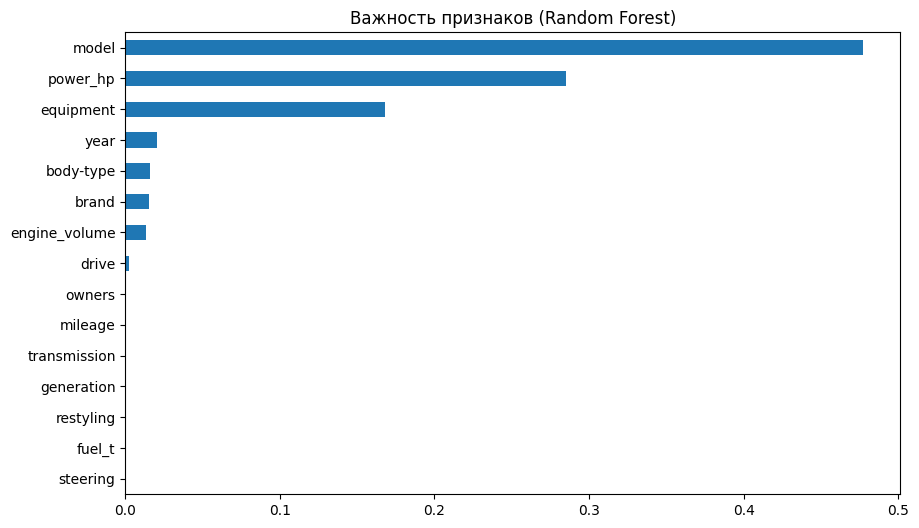

In [48]:
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Важность признаков (Random Forest)")
plt.show()


In [49]:
import joblib

joblib.dump(rf, 'car_price_model.pkl')
joblib.dump(encoders, 'label_encoders.pkl')


['label_encoders.pkl']